<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 25px"> ▼ Import Libraries </span>

In [5]:
import python_utils.common_utils as cu
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas
import os
import pandas as pd
import numpy as np
import warnings
%run ../visualizations/plottings.ipynb
warnings.filterwarnings('ignore')

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 25px"> ▼ Load Dataset </span>

In [9]:
df = cu.load_df("parquet", "pd", "../../dataset/compressed/ozone_hourly_2014.parquet")
df.head(10)

,state_code,county_code,poc,date_local,time_local,date_gmt,time_gmt,sample_measurement,units_of_measure,mdl,qualifier,method_type,method_code,method_name,state_name,county_name,date_of_last_change
0,01,003,1,2014-03-01,01:00,2014-03-01,07:00,0.047,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
1,01,003,1,2014-03-01,02:00,2014-03-01,08:00,0.047,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
2,01,003,1,2014-03-01,03:00,2014-03-01,09:00,0.043,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
3,01,003,1,2014-03-01,04:00,2014-03-01,10:00,0.038,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
4,01,003,1,2014-03-01,05:00,2014-03-01,11:00,0.035,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
5,01,003,1,2014-03-01,06:00,2014-03-01,12:00,0.035,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
6,01,003,1,2014-03-01,07:00,2014-03-01,13:00,0.034,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
7,01,003,1,2014-03-01,08:00,2014-03-01,14:00,0.037,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
8,01,003,1,2014-03-01,09:00,2014-03-01,15:00,0.044,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
9,01,003,1,2014-03-01,10:00,2014-03-01,16:00,0.046,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30


In [127]:
df.describe()

,poc,sample_measurement,mdl,method_code
count,9.037917e+06,9.037917e+06,9.037917e+06,9.037917e+06
mean,1.070348e+00,3.013781e-02,1.348698e-01,7.106337e+01
std,3.279214e-01,1.528778e-02,8.086479e-01,4.328538e+01
min,1.000000e+00,-5.000000e-03,6.000000e-04,1.900000e+01
25%,1.000000e+00,1.900000e-02,5.000000e-03,4.700000e+01
50%,1.000000e+00,3.000000e-02,5.000000e-03,8.700000e+01
75%,1.000000e+00,4.100000e-02,5.000000e-03,8.700000e+01
max,6.000000e+00,7.600000e-02,8.000000e+00,9.010000e+02


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 25px"> ▼ Univariate Analysis </span>

### ♦ Inspecting the ```sample_measurement``` using Histogram

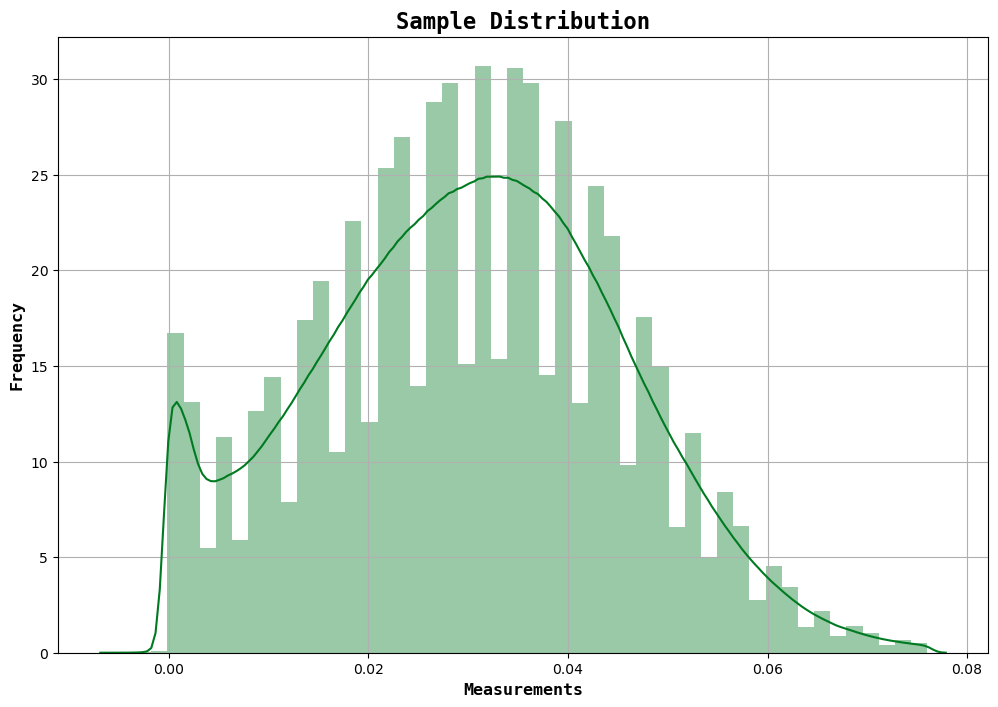

In [14]:
plot_dist(df['sample_measurement'], labels=["Sample Distribution", "Measurements", "Frequency"])


• From the above `graph`, it deviates from the normal and is `Positively Skewed`. However, the data has a `Platykurtic (Negative Kurtosis)` distribution i.e. fewer extreme values and a flatter peak than the `Normal Distribution`. Therefore, it is essential to clarify the `Skewness` and `Kurtosis` of the graph.

In [17]:
print(f"Skewness: {df['sample_measurement'].skew()}")
print(f"Kurtosis: {df['sample_measurement'].kurt()}")


Skewness: 0.05887803894285715
Kurtosis: -0.46814020357569497


• To deduce which variables are `outliers`, the idea is to establish a `threshold`. In order to achieve this, standardization of the data is prudent. Hypothetically, the data should have `a mean of 1 and a standard deviation of 0`. 

In [125]:
def compare_arrays(d1, d2, labels):
    df_combined = pd.DataFrame({labels[0]: d1.reshape(-1), labels[1]: d2.reshape(-1)})     
    return df_combined.head(25)
    

In [126]:
sample_df = pd.DataFrame(df['sample_measurement'])
print(f"\nMean of {sample_df.mean()}\nStd of {sample_df.std()}\n")

sample_scaled = StandardScaler().fit_transform(sample_df)
low_range = sample_scaled[sample_scaled[:, 0].argsort()[:25]]
high_range = sample_scaled[sample_scaled[:, 0].argsort()[-25:]]

print(compare_arrays(low_range, high_range, ['low_range', 'high_range']))      


Mean of sample_measurement    0.030138
dtype: float64
Std of sample_measurement    0.015288
dtype: float64
    low_range  high_range
0   -2.298424    2.999924
1   -2.298424    2.999924
2   -2.298424    2.999924
3   -2.298424    2.999924
4   -2.298424    2.999924
5   -2.298424    2.999924
6   -2.233013    2.999924
7   -2.233013    2.999924
8   -2.233013    2.999924
9   -2.233013    2.999924
10  -2.233013    2.999924
11  -2.233013    2.999924
12  -2.233013    2.999924
13  -2.233013    2.999924
14  -2.233013    2.999924
15  -2.233013    2.999924
16  -2.233013    2.999924
17  -2.233013    2.999924
18  -2.233013    2.999924
19  -2.233013    2.999924
20  -2.233013    2.999924
21  -2.233013    2.999924
22  -2.233013    2.999924
23  -2.233013    2.999924
24  -2.233013    2.999924


• The above analysis shows that the `lower range` values fall in a similar range and are also far from 0. Meanwhile, the `higher range values` have more distance from 0 compared to the lower range values but are more consistent.

• A `Whiskerplot` for `sample_measurement` is generated in order to visualize the statistical properties such as minimum, first quartile, median, third quartile, and maximum values.

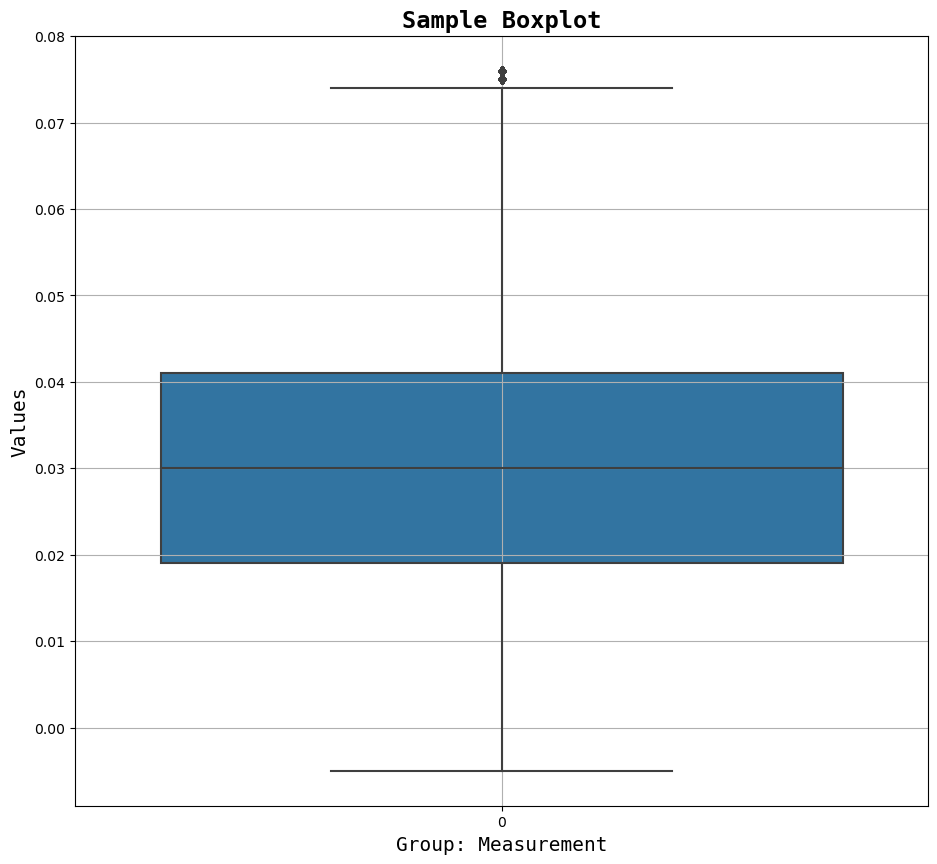

In [142]:
plot_boxplot(df['sample_measurement'], labels=["Sample Boxplot", "Group: Measurement", "Values"])

• From the above graph, the visual data is represented in a `statistical form` to reval the discrepencies as well as the ranges of the `sample_measurement`.

In [145]:
data = df['sample_measurement']
min_value = data.min()
quantile_1 = data.quantile(0.25)
interquantile = data.quantile(0.50)
median_value = data.median()
quantile_3 = data.quantile(0.75)
max_value = data.max()

print(f"Min: {min_value}\nQ1: {quantile_1}\nIQ: {interquantile}\nMedian: {median_value}\nQ3: {quantile_3}\nMax: {max_value}")


Min: -0.005
Q1: 0.019
IQ: 0.03
Median: 0.03
Q3: 0.041
Max: 0.076


• Finally, A `Violin Plot` is used to reveal additional information. Unlike a `Box plot` that can only show summary statistics, the violin plot depicts the summary statistics and the density of a variable. Therefore, in many instances, it can come in handy to have it in the data visualisation toolbox.

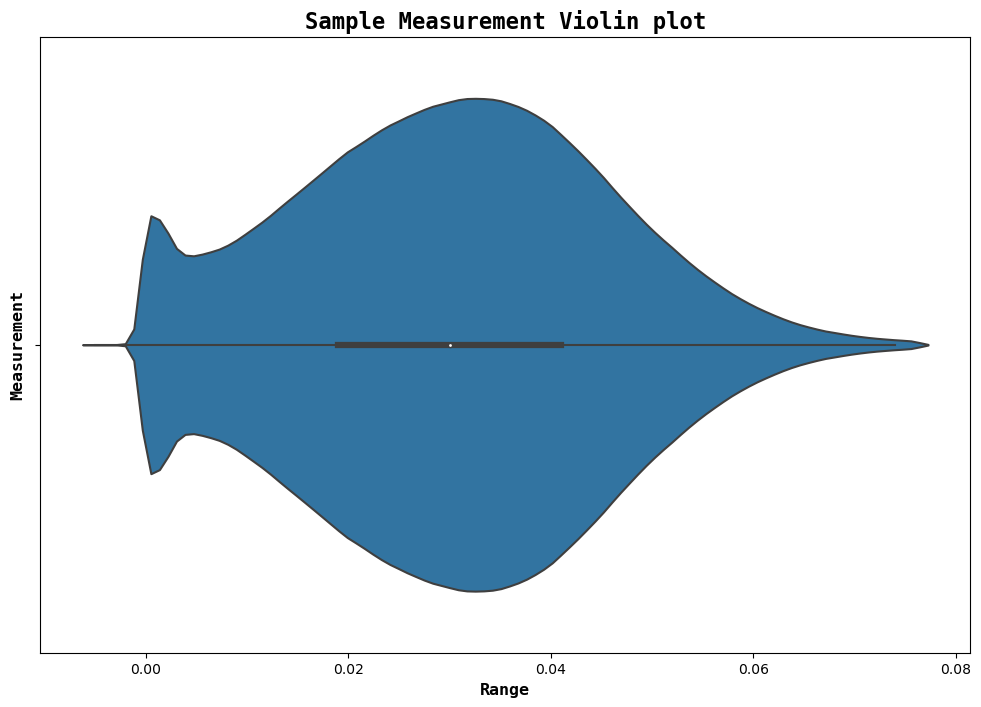

In [12]:
plot_violinplot(x='sample_measurement', df=df, labels=["Sample Measurement Violin plot", "Range", "Measurement"])

### ♦ The range of `poc` values are discrete and limited compared to `sample_measurement`. Therefore, to clearly illustrate the value of a data point along with its category, a `Bar plot` is drawn.

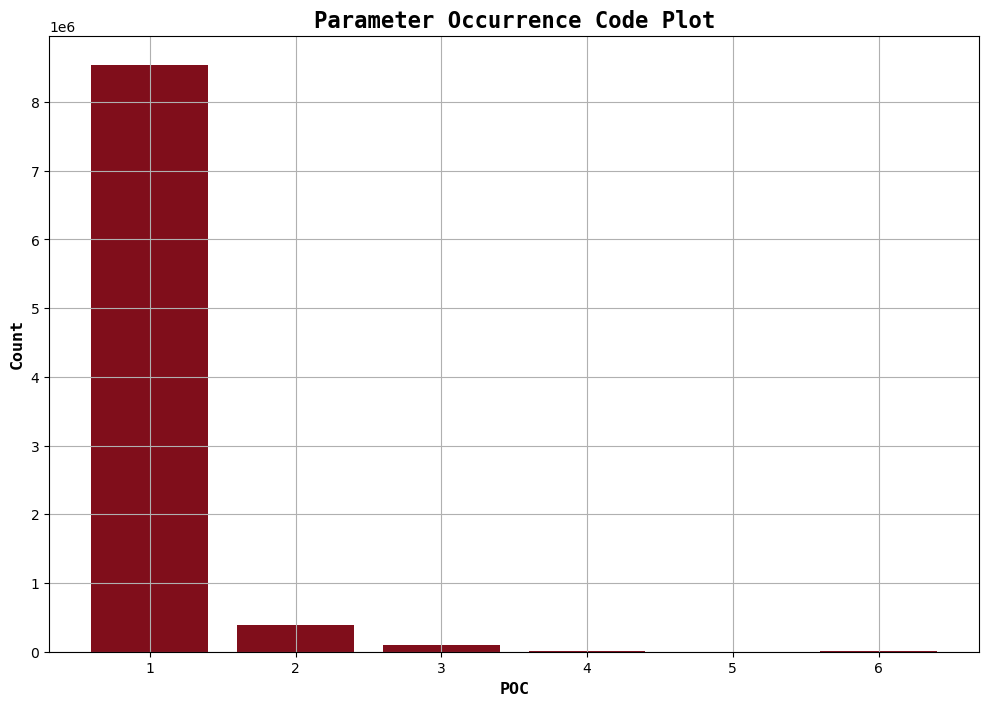

In [18]:
poc_dict = dict(df['poc'].value_counts())
x = [poc for poc in poc_dict]
y = [poc_dict[i] for i in poc_dict]

plot_bar(x, y, labels=["Parameter Occurrence Code Plot", "POC", "Count"])


• As suspected, the distribution of `category 1` of `poc` is more stacked than its counterparts. Meaning the exploration of bi/multivariate analysis could reveal more patterns.

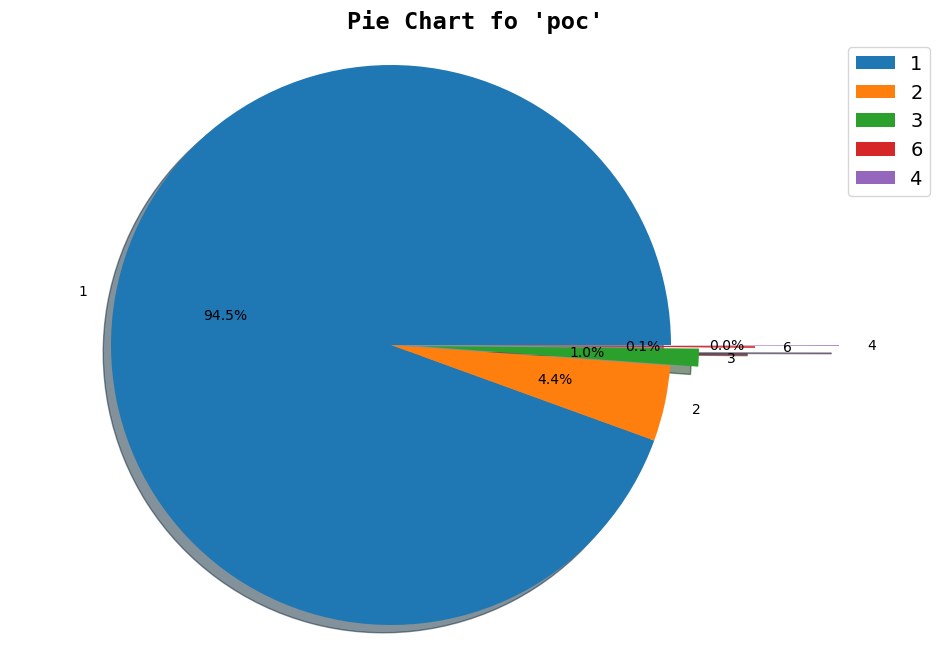

In [35]:
plot_pie(y, graph_labels=x, title="Pie Chart fo 'poc'", labels=x, explode=[0, 0, 0.1, 0.3, 0.6])


• The graph above reaffrims the primary and secondary occurance for `poc` restating that `1` and `2` is comprised of the majority data.

### ♦ Observing the quantitative data across the categorical variables, the feature `mdl` strikes similar resemblance to `poc` as see from the `Violin Plot` below.

In [54]:
df['mdl'].unique()

array([5.0e-03, 5.0e+00, 6.0e-04, 3.0e-03, 8.0e+00, 1.5e-03])

In [58]:
df['mdl'].value_counts()

mdl
0.0050    8656956
5.0000     221865
0.0030     118242
0.0006      17006
0.0015      15605
8.0000       8243
Name: count, dtype: int64

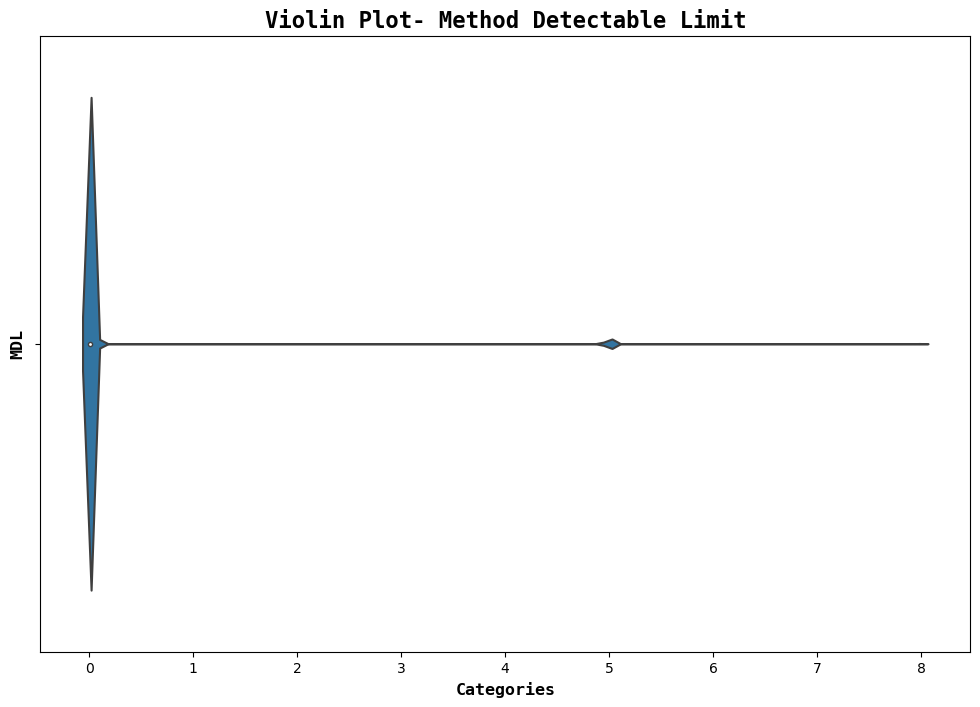

In [59]:
plot_violinplot(df=df, x = "mdl", labels=["Violin Plot- Method Detectable Limit", "Categories", "MDL"])


• Most data points fall around the `0.005` category than any other points, indicating `high skewness`. Most likely, the `quantile ranges` of such data could fall under a single point due to the high intensity.

In [60]:
data = df['mdl']
min_value = data.min()
quantile_1 = data.quantile(0.25)
interquantile = data.quantile(0.50)
median_value = data.median()
quantile_3 = data.quantile(0.75)
max_value = data.max()

print(f"Min: {min_value}\nQ1: {quantile_1}\nIQ: {interquantile}\nMedian: {median_value}\nQ3: {quantile_3}\nMax: {max_value}")


Min: 0.0006
Q1: 0.005
IQ: 0.005
Median: 0.005
Q3: 0.005
Max: 8.0


• As suspected, the `Q1`, `IQ`, `median value`, and `Q3` of the data is `0.005` with the `Minimum` value being `0.0006` and the `Maximum` value being `8.0` which is far away from the IQ range. Unless there is significance for this column in terms of bi/multivariate analysis. It might be a good idea to drop this column as it might create inconsistencies in the ML models.

## ♦ The geographical location of the experiment could give interesting insights of the Research carried on

In [62]:
df['state_name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Country Of Mexico'], dtype=object)

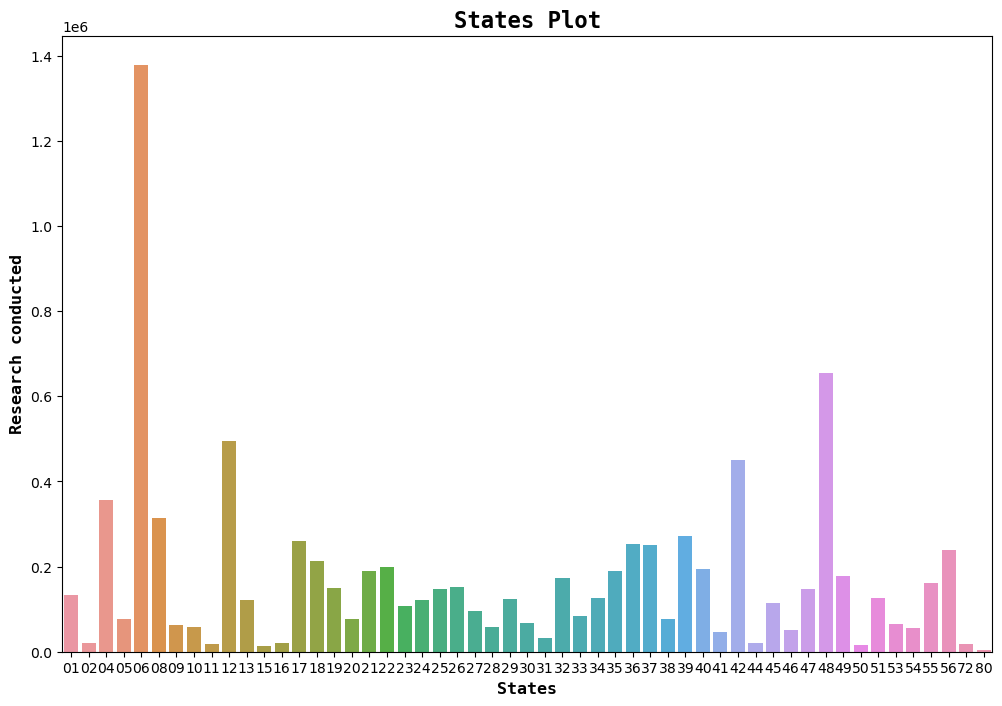

In [64]:
plot_countplot(df=df, x="state_code", labels=["States Plot", "States", "Research conducted"])

• The above `Countplot` graph for the `state_name` variable visualizes the number of research conducted as well as its recordings archived. Since the names of the states would overlap each other, the `state_code` variable is utilized to ensure visual consistency.

In [26]:
pd.unique(df['state_code'] + ' ' + df['state_name'])


array(['01 Alabama', '02 Alaska', '04 Arizona', '05 Arkansas',
       '06 California', '08 Colorado', '09 Connecticut', '10 Delaware',
       '11 District Of Columbia', '12 Florida', '13 Georgia', '15 Hawaii',
       '16 Idaho', '17 Illinois', '18 Indiana', '19 Iowa', '20 Kansas',
       '21 Kentucky', '22 Louisiana', '23 Maine', '24 Maryland',
       '25 Massachusetts', '26 Michigan', '27 Minnesota',
       '28 Mississippi', '29 Missouri', '30 Montana', '31 Nebraska',
       '32 Nevada', '33 New Hampshire', '34 New Jersey', '35 New Mexico',
       '36 New York', '37 North Carolina', '38 North Dakota', '39 Ohio',
       '40 Oklahoma', '41 Oregon', '42 Pennsylvania', '44 Rhode Island',
       '45 South Carolina', '46 South Dakota', '47 Tennessee', '48 Texas',
       '49 Utah', '50 Vermont', '51 Virginia', '53 Washington',
       '54 West Virginia', '55 Wisconsin', '56 Wyoming', '72 Puerto Rico',
       '80 Country Of Mexico'], dtype=object)

• The mapping of the `state_code` and `state_name` is mentioned above so that it will be easy to track each state by is respective state code and interpret the recordings gathered.

In [38]:
counties_query = df['county_name'].where(df['state_name']=='Alabama').dropna().unique()

print(f"Listing {len(list(counties_query))} Counties in Alabama:")
list(counties_query)


Listing 15 Counties in Alabama:


'Baldwin'

• As can be observed from the above query, there are multiple recordings taken in different counties in a single state. In this example, the state `Alabama` has 15 counties.

• Using the `unique() function`, we can acquire the distinct `state-name` presented inside the data, apply the previous query to get all the `county_name` for each state along with the count.

In [44]:
states = df['state_name'].unique()

for state in states:
    print(f"► {state}:")
    counties_query = df['county_name'].where(df['state_name']==state).dropna().unique()
    print(counties_query)
    print(f"Total number of counties = {len(list(counties_query))}\n")


► Alabama:
['Baldwin' 'Colbert' 'DeKalb' 'Elmore' 'Etowah' 'Houston' 'Jefferson'
 'Madison' 'Mobile' 'Montgomery' 'Morgan' 'Russell' 'Shelby' 'Sumter'
 'Tuscaloosa']
Total number of counties = 15

► Alaska:
['Denali ' 'Fairbanks North Star ' 'Matanuska-Susitna ']
Total number of counties = 3

► Arizona:
['Cochise' 'Coconino' 'Gila' 'La Paz' 'Maricopa' 'Navajo' 'Pima' 'Pinal'
 'Yavapai' 'Yuma']
Total number of counties = 10

► Arkansas:
['Clark' 'Crittenden' 'Newton' 'Polk' 'Pulaski' 'Washington']
Total number of counties = 6

► California:
['Alameda' 'Amador' 'Butte' 'Calaveras' 'Colusa' 'Contra Costa'
 'El Dorado' 'Fresno' 'Glenn' 'Humboldt' 'Imperial' 'Inyo' 'Kern' 'Kings'
 'Lake' 'Los Angeles' 'Madera' 'Marin' 'Mariposa' 'Mendocino' 'Merced'
 'Monterey' 'Napa' 'Nevada' 'Orange' 'Placer' 'Riverside' 'Sacramento'
 'San Benito' 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Siskiyou' 'Solan

['Abbeville' 'Aiken' 'Anderson' 'Berkeley' 'Charleston' 'Cherokee'
 'Chesterfield' 'Colleton' 'Darlington' 'Edgefield' 'Greenville' 'Oconee'
 'Pickens' 'Richland' 'Spartanburg' 'York']
Total number of counties = 16

► South Dakota:
['Brookings' 'Custer' 'Jackson' 'Meade' 'Minnehaha' 'Union']
Total number of counties = 6

► Tennessee:
['Anderson' 'Blount' 'Claiborne' 'Davidson' 'DeKalb' 'Hamilton'
 'Jefferson' 'Knox' 'Loudon' 'McMinn' 'Sevier' 'Shelby' 'Sullivan'
 'Sumner' 'Williamson' 'Wilson']
Total number of counties = 16

► Texas:
['Bell' 'Bexar' 'Brazoria' 'Brewster' 'Cameron' 'Collin' 'Dallas' 'Denton'
 'Ellis' 'El Paso' 'Galveston' 'Gregg' 'Harris' 'Harrison' 'Hidalgo'
 'Hood' 'Hunt' 'Jefferson' 'Johnson' 'Kaufman' 'McLennan' 'Montgomery'
 'Navarro' 'Nueces' 'Orange' 'Parker' 'Polk' 'Randall' 'Rockwall' 'Smith'
 'Tarrant' 'Travis' 'Victoria' 'Webb']
Total number of counties = 34

► Utah:
['Box Elder' 'Cache' 'Carbon' 'Daggett' 'Davis' 'Duchesne' 'Garfield'
 'Salt Lake' 'San Juan'

• From the above output, we can see that state with the largest count of counties experimented on is in `California`, whereas the smallest number of counties present is in `District Of Columbia, Hawaii, and Country Of Mexico`. This would be an ideal scenario to test which feature would factor any change for the sample measurement value.

• For the first example, random counties from `Connecticut` state is used to test if there is any major dropoff or alterations among the `sample_measurement` value.

In [65]:
mean_value_counties = {}
rand_counties = ['New London','Fairfield', 'Litchfield', 'Middlesex']

for county in rand_counties:
    mean_value_counties[county] = round(df['sample_measurement'].where(df['county_name']==county).dropna().mean(), 3)

print(mean_value_counties)

{'New London': 0.034, 'Fairfield': 0.034, 'Litchfield': 0.036, 'Middlesex': 0.029}


• Upon rounding each values to 3 figures, there are still similar to each other. Ofcourse, this is a single sample, but the overall idea is the fact that there are some counties that gives similar values which would make the initial data-modeling more complex for the potential model. 

In [63]:
mean_value_states = {}
rand_states = ['Florida','Connecticut', 'District Of Columbia', 'California']

for state in rand_states:
    mean_value_states[state] = round(df['sample_measurement'].where(df['state_name']==state).dropna().mean(), 3)

print(mean_value_states)

{'Florida': 0.027, 'Connecticut': 0.033, 'District Of Columbia': 0.026, 'California': 0.031}


• A random sample of different states are selected, which shows variance in the measurement data. Ultimately, it depends on the practitioner to keep which feature based on the interpretations. In this case, the above test shows that the geographical importance matters in finding the sample value as it has a direct influence. However, keeping both states and county could make the data complexity far worse, and since overfitting is often due to an overly complex model or noisy data, it is advisable to truncate the `county_name` and keep the `state_name` from the dataset to gain an ideal edge. Since the observation is still not complete, the `county_name` column along with `county_code` will be dropped near the end of the exploration.


In [93]:
state_count = df['state_name'].value_counts(ascending=False)[0:20]
print("Top 20 States experiment was performed the most:\n", state_count.reset_index())

Top 20 States experiment was performed the most:
         state_name    count
0       California  1378049
1            Texas   654010
2          Florida   495615
3     Pennsylvania   450281
4          Arizona   357200
5         Colorado   312939
6             Ohio   272391
7         Illinois   259161
8         New York   253222
9   North Carolina   251468
10         Wyoming   238093
11         Indiana   213355
12       Louisiana   199958
13        Oklahoma   195389
14        Kentucky   189500
15      New Mexico   189330
16            Utah   178304
17          Nevada   174231
18       Wisconsin   161558
19        Michigan   152346


• Top 20 States where the research was carried out the most. The `Horizontal Bar Plot` paints a clear picture on the top States with experiments.

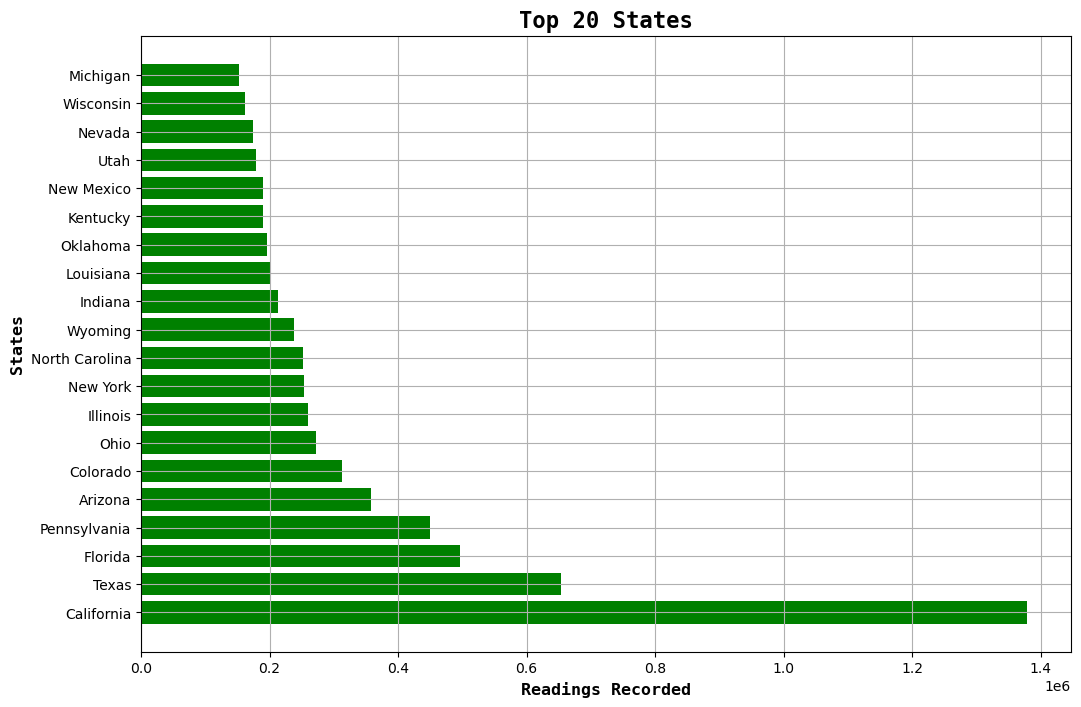

In [94]:
x = state_count.index
y = state_count.values

plot_bar(x, y, h_orientation=True, labels=["Top 20 States", "Readings Recorded", "States"], color='green')

Exception: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


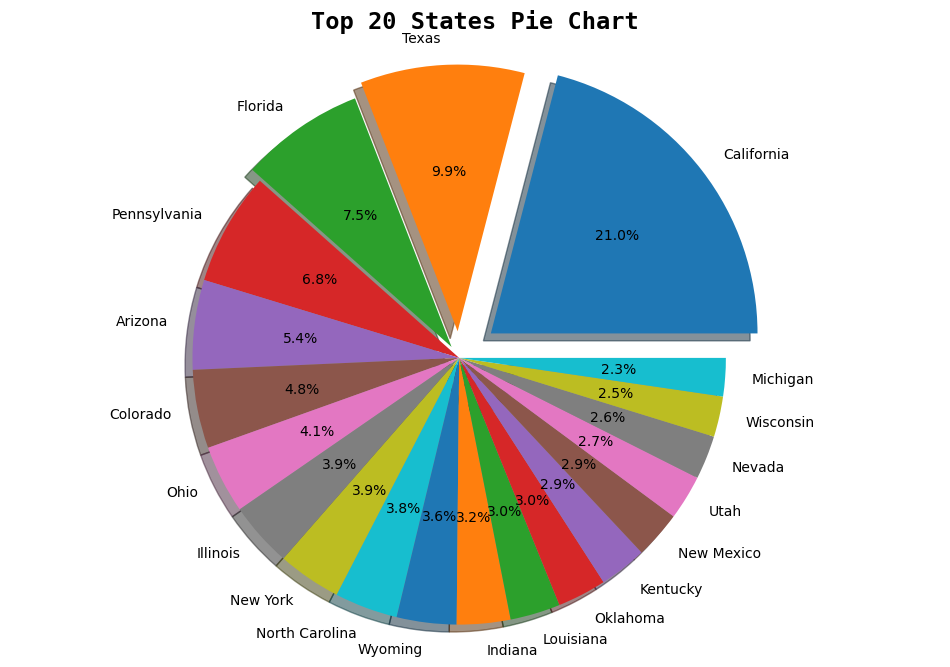

In [101]:
labels = state_count[0:20].keys().map(str)
explode = (0.15, 0.1, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plot_pie(df=y, graph_labels=x, labels=labels, explode=explode, title="Top 20 States Pie Chart")

• From the `Pie Chart`, `California` state scores `21.0%` having the maximum percentage whereas `Texas` has the second-most instrument set-ups for research attainging `9.9%`.

• On the contrary, the `state_name` with the least number of research conducted is also listed below:

In [84]:
state_count = df['state_name'].value_counts(ascending=True)[0:20]
print("Least 20 States experiment was performed the most:\n", state_count.reset_index())

Least 20 States experiment was performed the most:
               state_name  count
0      Country Of Mexico   4139
1                 Hawaii  13705
2                Vermont  15436
3            Puerto Rico  19009
4   District Of Columbia  19165
5           Rhode Island  20009
6                 Alaska  20246
7                  Idaho  20332
8               Nebraska  31843
9                 Oregon  46762
10          South Dakota  51343
11         West Virginia  56238
12           Mississippi  57566
13              Delaware  57772
14           Connecticut  63497
15            Washington  64547
16               Montana  66648
17                Kansas  76588
18          North Dakota  77220
19              Arkansas  77267


• As can be observed, the `Country of Mexico` was the least experimented location carried out with a count of `4,139` where other States are well abover 10,000, especially the second least State `Hawaii` which garnered `13,705`, which is more than 3 times the reasearch that were conducted. 

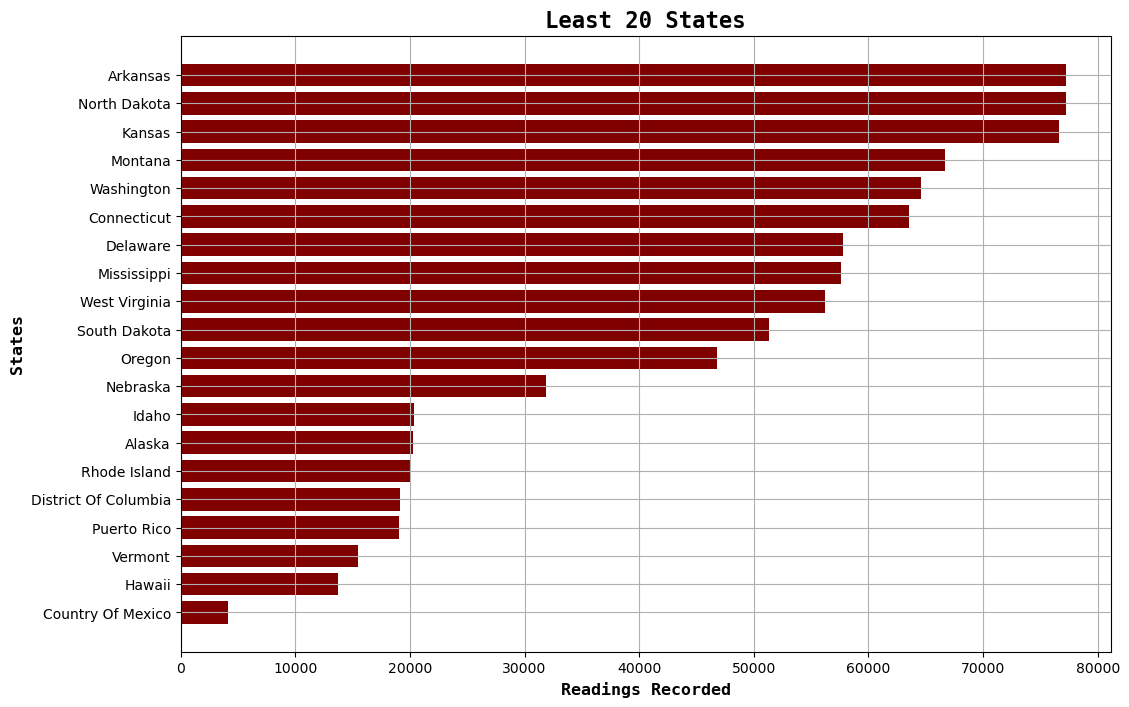

In [85]:
x = state_count.index
y = state_count.values

plot_bar(x, y, h_orientation=True, labels=["Least 20 States", "Readings Recorded", "States"], color="maroon")

• The `Bar plot` to illustrate the Least `state_name` for Recording Research.

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 25px"> ▼ Multivariate Analysis </span>

### ♦ `Subplot Histogram` displaying the side-by-side differences in terms of distribution for the numeric columns.

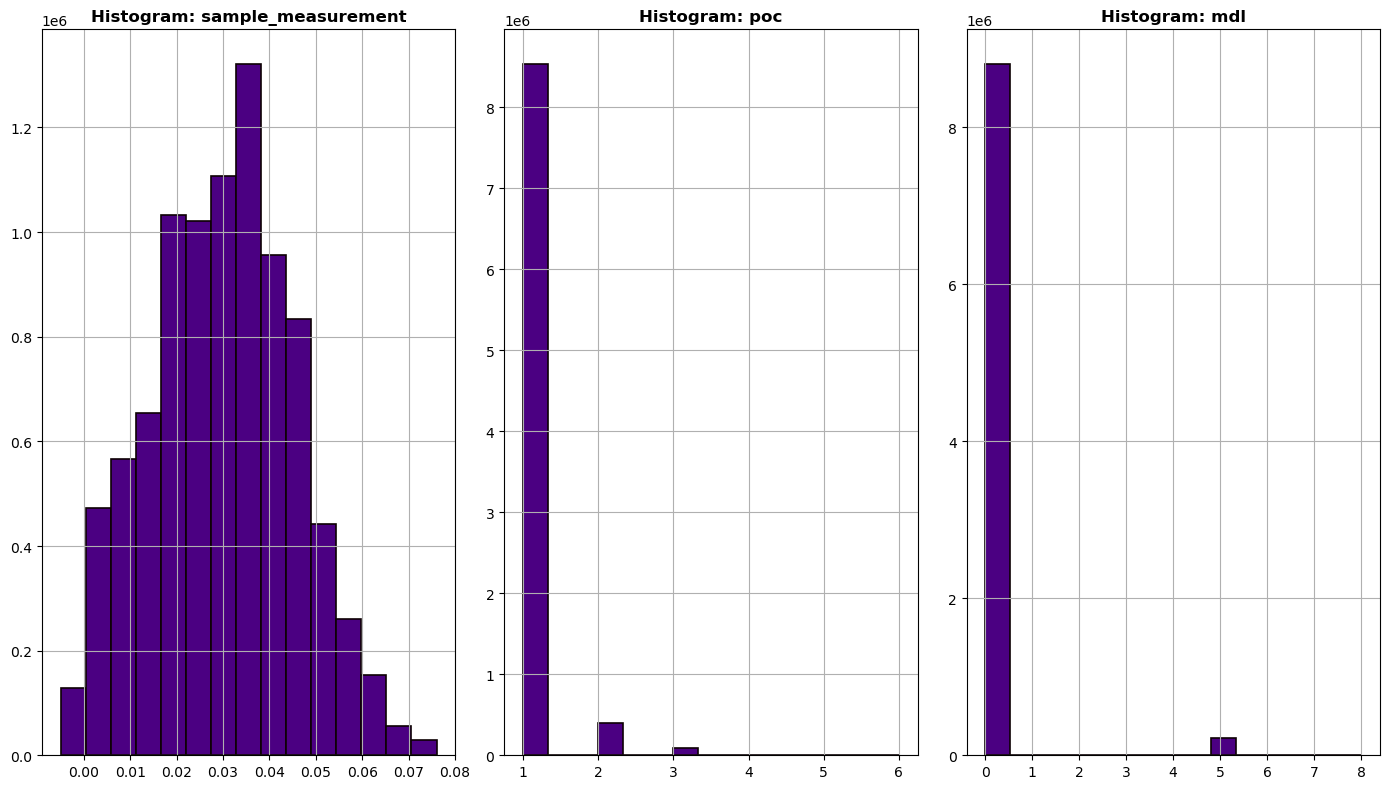

In [103]:
data_List = [df['sample_measurement'], df['poc'], df['mdl']]

generate_subplots(data_List, bins=15, color='indigo')

• From the above comparison, the `sample_measurement` follows a `Bell-Curve` similarity compared to `poc` and `mdl`.

### ♦ Method Uniqueness: 

In [42]:
print(f"> Method Type\nUnique Count: {df['method_type'].nunique()}\nUnique Values: \n{df['method_type'].unique()}\n")
print(f"> Method Code\nUnique Count: {df['method_code'].nunique()}\nUnique Values: \n{df['method_code'].unique()}\n")
print(f"> Method Name\nUnique Count: {df['method_name'].nunique()}\nUnique Values: \n{df['method_name'].unique()}")


> Method Type
Unique Count: 2
Unique Values: 
['FEM' 'Non-FRM']

> Method Code
Unique Count: 12
Unique Values: 
[ 47  87  56  19 199  91 190 901 187  53 160 112]

> Method Name
Unique Count: 8
Unique Values: 
['INSTRUMENTAL - ULTRA VIOLET' 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION'
 'Instrumental - Chemiluminescence API Model 265E and T265'
 'INSTRUMENTAL - ULTRAVIOLET RADIATION ABSORBTN'
 'Instrumental - UV absorption photometry/UV 2B model 202 and 205'
 'Instrumental - Ultra Violet 2B Model 202'
 'Instrumental - Ecotech Serinus 10'
 'INSTRUMENTAL - ULTRAVIOLET ABSORPTION']


• Since, each method do not contribute anything on the data, it is worth checking they hold any importance when amalgamated, especially attributes such as `method_name`, `method_code`, and `method_type`.

In [44]:
df_methods = df['method_name'] + ' - ' + str(df['method_code']) + ' - ' + df['method_type']
df_methods.describe()
df_methods = pd.DataFrame([df_methods.unique()]).dropna().T
df_methods.columns = ['Methods Combinations']
df_methods.head(10)


,Methods Combinations
0,INSTRUMENTAL - ULTRA VIOLET - 0 47\n1...
1,INSTRUMENTAL - ULTRA VIOLET ABSORPTION - 0 ...
2,Instrumental - Chemiluminescence API Model 265...
3,INSTRUMENTAL - ULTRAVIOLET RADIATION ABSORBTN ...
4,Instrumental - UV absorption photometry/UV 2B ...
5,Instrumental - Ultra Violet 2B Model 202 - 0 ...
6,Instrumental - Ecotech Serinus 10 - 0 ...
7,INSTRUMENTAL - ULTRAVIOLET ABSORPTION - 0 ...


• In `IPython`, the information is truncated to just 50 characters, anything in excess is ellipsized. However, using `context managers`, the full data can be displayed.

In [62]:
with pd.option_context('display.max_colwidth', None):
    display(df_methods)
    
print(f"\n> Method Combinations Column\nUnique Count: {df_methods.nunique()}")

,Methods Combinations
0,"INSTRUMENTAL - ULTRA VIOLET - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - FEM"
1,"INSTRUMENTAL - ULTRA VIOLET ABSORPTION - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - FEM"
2,"Instrumental - Chemiluminescence API Model 265E and T265 - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - FEM"
3,"INSTRUMENTAL - ULTRAVIOLET RADIATION ABSORBTN - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - FEM"
4,"Instrumental - UV absorption photometry/UV 2B model 202 and 205 - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - FEM"
5,"Instrumental - Ultra Violet 2B Model 202 - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - Non-FRM"
6,"Instrumental - Ecotech Serinus 10 - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - FEM"
7,"INSTRUMENTAL - ULTRAVIOLET ABSORPTION - 0 47\n1 47\n2 47\n3 47\n4 47\n ..\n9037912 87\n9037913 87\n9037914 87\n9037915 87\n9037916 87\nName: method_code, Length: 9037917, dtype: int32 - FEM"



> Method Combinations Column
Unique Count: Methods Combinations    8
dtype: int64


• Combining the three attributes is resulted in a `new single combined variable` that can act as a `categorical feature` that could be more effective than three separate columns. Moreover, it would reduce computational power and could make the entire dataset processing more effective.


In [76]:
 combined_df = df.copy()

In [64]:
combined_df.head()

,state_code,county_code,poc,date_local,time_local,date_gmt,time_gmt,sample_measurement,units_of_measure,mdl,qualifier,method_type,method_code,method_name,state_name,county_name,date_of_last_change
0,01,003,1,2014-03-01,01:00,2014-03-01,07:00,0.047,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
1,01,003,1,2014-03-01,02:00,2014-03-01,08:00,0.047,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
2,01,003,1,2014-03-01,03:00,2014-03-01,09:00,0.043,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
3,01,003,1,2014-03-01,04:00,2014-03-01,10:00,0.038,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
4,01,003,1,2014-03-01,05:00,2014-03-01,11:00,0.035,Parts per million,0.005,None,FEM,47,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30


In [77]:
combined_df['method_code'] = combined_df['method_code'].astype(str)

In [78]:
combined_df['combined_method'] = combined_df['method_name'] + ' - ' + (combined_df['method_code']) + ' - ' + combined_df['method_type']


In [79]:
combined_df['combined_method'].head()

0    INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
1    INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
2    INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
3    INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
4    INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
Name: combined_method, dtype: object

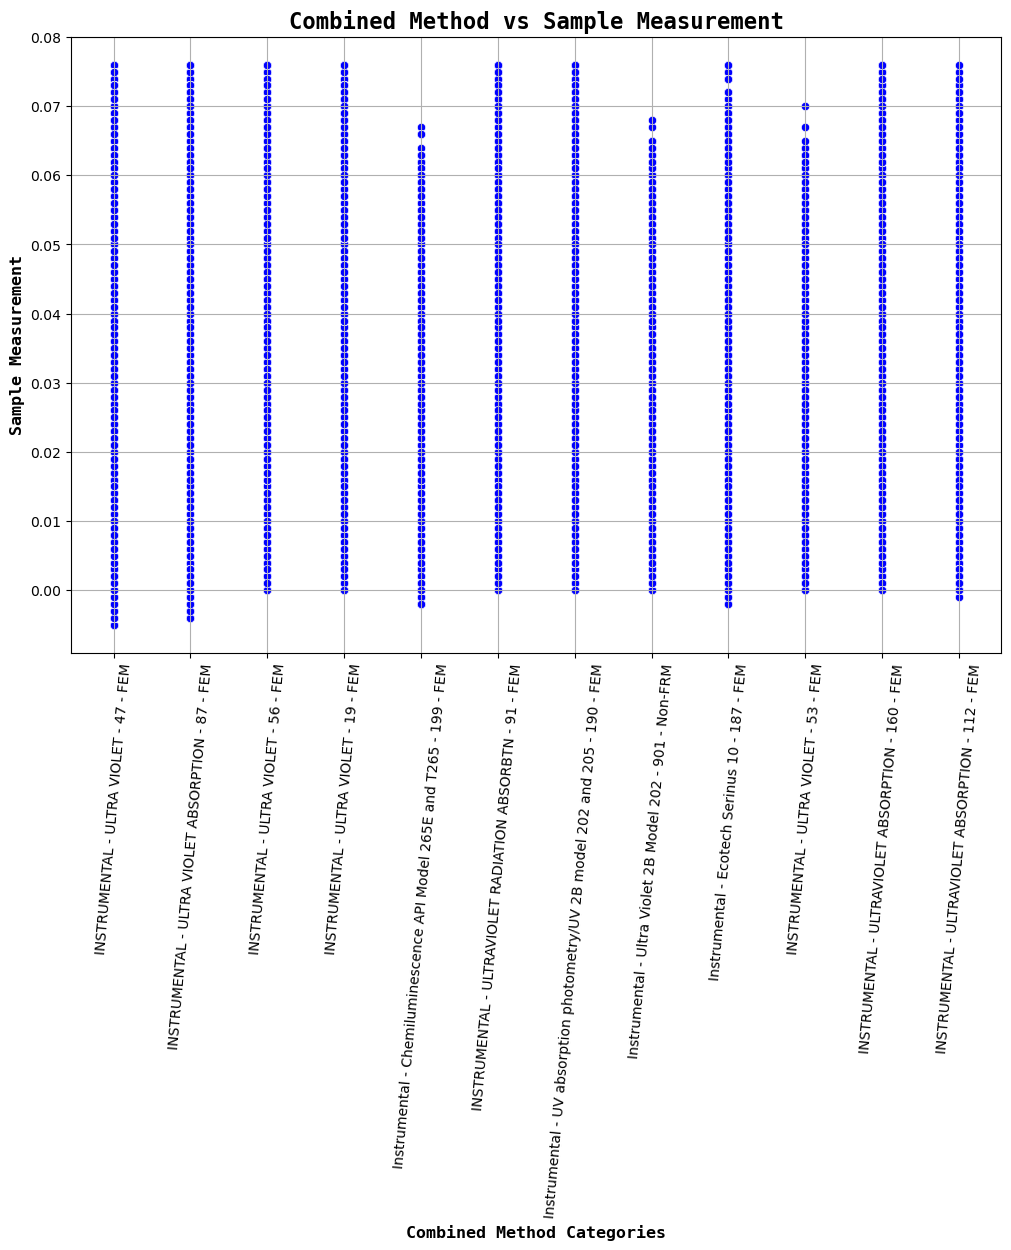

In [86]:
text = "Combined Method vs Sample Measurement"
xlabel = "Combined Method Categories"
ylabel = "Sample Measurement"

plt.figure(figsize=(12,8))
sb.scatterplot(x="combined_method", y="sample_measurement", data=combined_df, color='blue')
plt.xticks(rotation=85)
plt.title(text, fontsize=16, fontweight='bold', family='monospace')
plt.xlabel(xlabel, fontsize=12, fontweight='bold', family='monospace')
plt.ylabel(ylabel, fontsize=12, fontweight='bold', family='monospace')
plt.grid()
plt.show()


• The above `Scatterplot` shows the relationship and/or differences between the two variables. There are some interesting takeaways from it, especially for the range of sample_measurement according to each method in the `combine_method` variable. Firstly, the `Ultraviolet - 47 - FEM` or UV-47-FEM in short, displays negative values for Measurements. Similar pattern also is being displayed by `UV Absorbtion-87-FEM`. For `EOtech serinus 10 - 187 - FEM` and `UV Absorbtion-160-FEM`, the minimum values does dip slightly to negative but no to the extent fo the aforementioned instruments. The primary difference of pattern is showed by `Chemiluminescence API Model 265E and T265 - 199 - FEM`, `UV 2B Model 202 - 901 - Non-FEM`, and `UV-53-FEM` where the overall range is significantly smaller than other instruments and the minimum measurement reading ususally revolves around the zero. Therefore, the new combined variable displays potential possibility to be a useful feature instead of separate attributes.

In [89]:
combined_df.drop(labels=['method_name', 'method_code', 'method_type'], axis=1, inplace=True)
combined_df.columns

Index(['state_code', 'county_code', 'poc', 'date_local', 'time_local',
       'date_gmt', 'time_gmt', 'sample_measurement', 'units_of_measure', 'mdl',
       'qualifier', 'state_name', 'county_name', 'date_of_last_change',
       'combined_method'],
      dtype='object')

In [92]:
path = "../../dataset/processed/ozone_hourly_2014.parquet"
cu.save_df(combined_df, "parquet", path)

byte_to_mb = 1/(10**6)
processed_size = round(os.path.getsize(path)*byte_to_mb, 2)
print(f"Filtered dataset size: {processed_size} MB.")


Filtered dataset size: 10.1 MB.


• The separate attributes are truncated from the new DataFrame and the filtered alterations are saved inside the `filtered` directory.

In [3]:
combined_df = cu.load_df("parquet", "pd", "../../dataset/processed/ozone_hourly_2014.parquet")
combined_df.head(10)

,state_code,county_code,poc,time_local,sample_measurement,units_of_measure,mdl,qualifier,state_name,county_name,date_of_last_change,combined_method
0,01,003,1,01:00,0.047,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
1,01,003,1,02:00,0.047,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
2,01,003,1,03:00,0.043,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
3,01,003,1,04:00,0.038,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
4,01,003,1,05:00,0.035,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
5,01,003,1,06:00,0.035,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
6,01,003,1,07:00,0.034,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
7,01,003,1,08:00,0.037,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
8,01,003,1,09:00,0.044,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
9,01,003,1,10:00,0.046,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM


### ♦ Sample Measurement over Time:

• The relationship between the `sample_measurement` at each time also needs to be visually explored in order to reaffirm the previous observations.

In [13]:
time_list = list(combined_df['time_local'].unique())
sample_value_list = []

for time in time_list:
    sample_value = round(combined_df['sample_measurement'].where(combined_df['time_local']==time).mean(), 4)
    sample_value_list.append(sample_value)
    print(f"Mean value at {time}: {sample_value}")


Mean value at 01:00: 0.0234
Mean value at 02:00: 0.0224
Mean value at 03:00: 0.022
Mean value at 04:00: 0.0208
Mean value at 05:00: 0.0194
Mean value at 06:00: 0.0195
Mean value at 07:00: 0.0222
Mean value at 08:00: 0.0267
Mean value at 09:00: 0.0313
Mean value at 10:00: 0.0352
Mean value at 11:00: 0.0381
Mean value at 12:00: 0.04
Mean value at 13:00: 0.0411
Mean value at 14:00: 0.0416
Mean value at 15:00: 0.0415
Mean value at 16:00: 0.0405
Mean value at 17:00: 0.0382
Mean value at 18:00: 0.0349
Mean value at 19:00: 0.0315
Mean value at 20:00: 0.029
Mean value at 21:00: 0.0272
Mean value at 22:00: 0.0259
Mean value at 23:00: 0.025
Mean value at 00:00: 0.0242


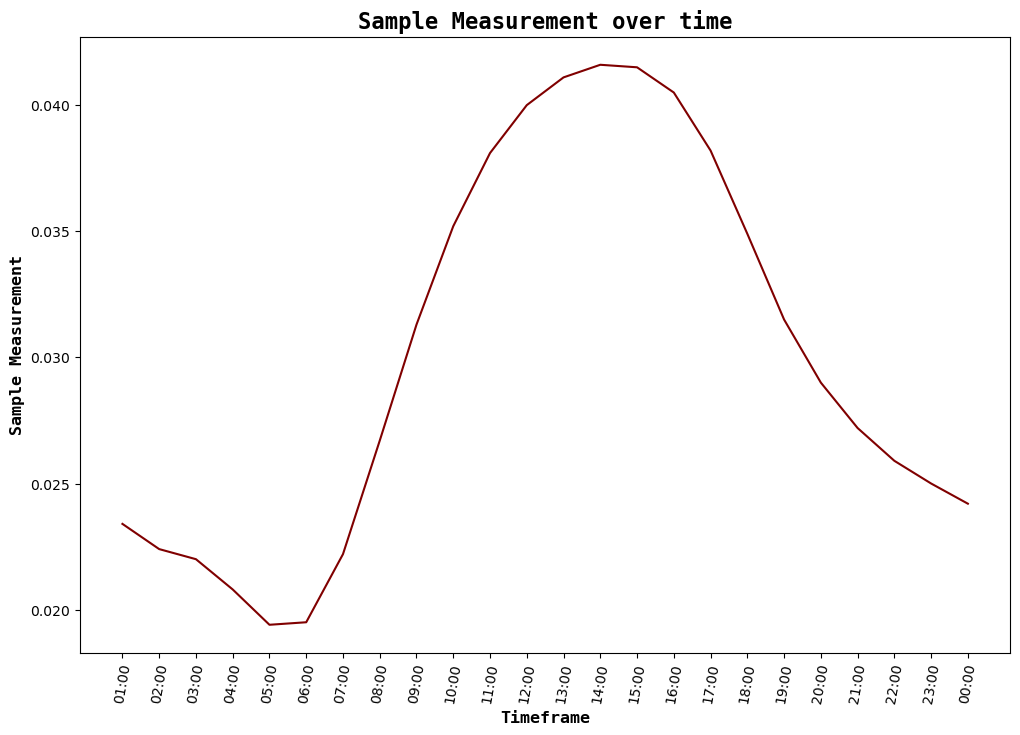

In [23]:
text = "Sample Measurement over time"
xlabel = "Timeframe"
ylabel = "Sample Measurement"

plot_lineplots(x=time_list, y=sample_value_list, labels=[text, xlabel, ylabel], x_rotation=80)


• From the above `Lineplot`, the average peak value of the sample measurement is around `14:00` to `15:00`, forming a shape similar to a `Gaussian distribution`. The lowest values can be recorded at `5:00` to `6:00`. The measurement makes sense since during the daytime, there are more activity in the sky, especially solar radiation that might ultimately, have influence over the recordings being high, especially the time where the sun usually is at the most center position.

In [28]:
combined_df.columns

Index(['state_code', 'county_code', 'poc', 'date_local', 'time_local',
       'date_gmt', 'time_gmt', 'sample_measurement', 'units_of_measure', 'mdl',
       'qualifier', 'state_name', 'county_name', 'date_of_last_change',
       'combined_method'],
      dtype='object')

• Even though the `time_local` plays an important role in influencing the `measurement`, other time factor variables such as `date_gmt`, `time_gmt`, and `date_local` do not play any pivotal role and are there to record as an index. Therefore, it is advisable to truncate the aforementioned columns as they would not be required for this study.

In [29]:
combined_df.drop(labels=['date_gmt', 'time_gmt', 'date_local'], axis=1, inplace=True)
combined_df.columns

Index(['state_code', 'county_code', 'poc', 'time_local', 'sample_measurement',
       'units_of_measure', 'mdl', 'qualifier', 'state_name', 'county_name',
       'date_of_last_change', 'combined_method'],
      dtype='object')

 • Update the data.

In [30]:
path = "../../dataset/processed/ozone_hourly_2014.parquet"
cu.save_df(combined_df, "parquet", path)

byte_to_mb = 1/(10**6)
processed_size = round(os.path.getsize(path)*byte_to_mb, 2)
print(f"Filtered dataset size: {processed_size} MB.")


Filtered dataset size: 8.62 MB.


In [76]:
combined_df = cu.load_df("parquet", "pd", "../../dataset/processed/ozone_hourly_2014.parquet")
combined_df.head(10)

,state_code,county_code,poc,time_local,sample_measurement,units_of_measure,mdl,qualifier,state_name,county_name,date_of_last_change,combined_method
0,01,003,1,01:00,0.047,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
1,01,003,1,02:00,0.047,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
2,01,003,1,03:00,0.043,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
3,01,003,1,04:00,0.038,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
4,01,003,1,05:00,0.035,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
5,01,003,1,06:00,0.035,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
6,01,003,1,07:00,0.034,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
7,01,003,1,08:00,0.037,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
8,01,003,1,09:00,0.044,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM
9,01,003,1,10:00,0.046,Parts per million,0.005,None,Alabama,Baldwin,2014-06-30,INSTRUMENTAL - ULTRA VIOLET - 47 - FEM


• The effects of `mdl` and `poc` upon time is also explored below.

In [32]:
time_list = list(combined_df['time_local'].unique())
mdl_list = []
poc_list = []

for time in time_list:
    mdl_value = round(combined_df['mdl'].where(combined_df['time_local']==time).mean(), 3)
    poc_value = round(combined_df['poc'].where(combined_df['time_local']==time).mean(), 3)    
    mdl_list.append(mdl_value)
    poc_list.append(poc_value)
    print(f"Mean MDL at {time}: {mdl_value}")
    print(f"Mean POC at {time}: {poc_value}\n")


Mean MDL at 01:00: 0.145
Mean POC at 01:00: 1.07

Mean MDL at 02:00: 0.149
Mean POC at 02:00: 1.071

Mean MDL at 03:00: 0.144
Mean POC at 03:00: 1.075

Mean MDL at 04:00: 0.014
Mean POC at 04:00: 1.074

Mean MDL at 05:00: 0.14
Mean POC at 05:00: 1.07

Mean MDL at 06:00: 0.14
Mean POC at 06:00: 1.07

Mean MDL at 07:00: 0.14
Mean POC at 07:00: 1.07

Mean MDL at 08:00: 0.14
Mean POC at 08:00: 1.07

Mean MDL at 09:00: 0.14
Mean POC at 09:00: 1.07

Mean MDL at 10:00: 0.14
Mean POC at 10:00: 1.07

Mean MDL at 11:00: 0.139
Mean POC at 11:00: 1.07

Mean MDL at 12:00: 0.138
Mean POC at 12:00: 1.07

Mean MDL at 13:00: 0.137
Mean POC at 13:00: 1.07

Mean MDL at 14:00: 0.136
Mean POC at 14:00: 1.07

Mean MDL at 15:00: 0.136
Mean POC at 15:00: 1.07

Mean MDL at 16:00: 0.136
Mean POC at 16:00: 1.07

Mean MDL at 17:00: 0.136
Mean POC at 17:00: 1.07

Mean MDL at 18:00: 0.138
Mean POC at 18:00: 1.07

Mean MDL at 19:00: 0.138
Mean POC at 19:00: 1.07

Mean MDL at 20:00: 0.138
Mean POC at 20:00: 1.07

Mea

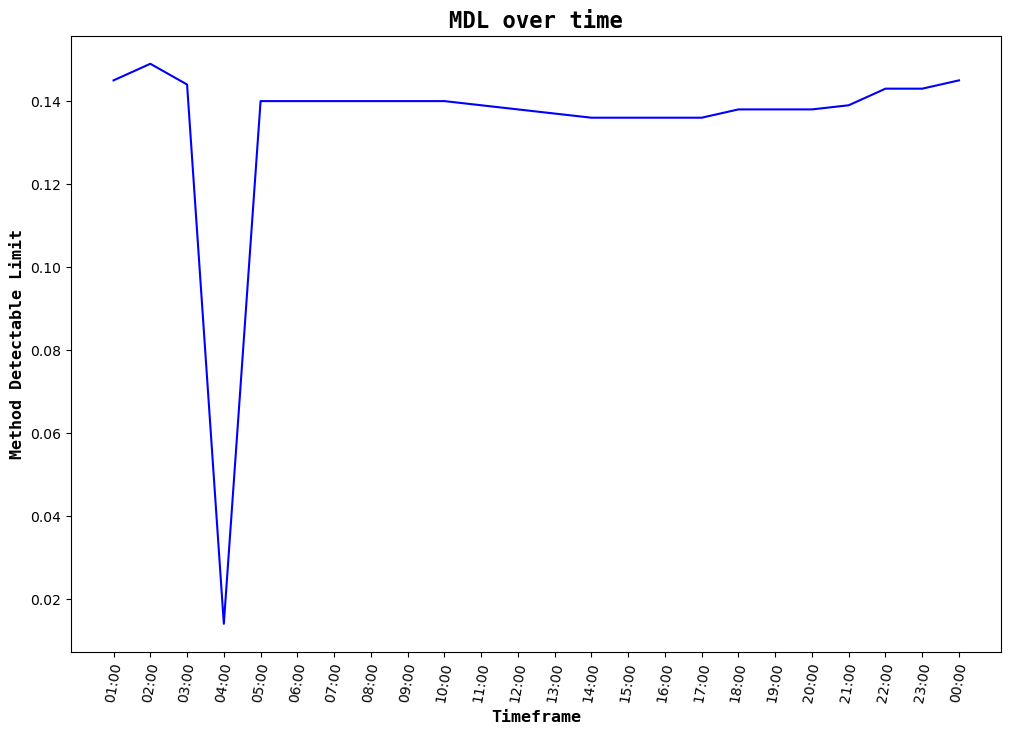

In [36]:
text = "MDL over time"
xlabel = "Timeframe"
ylabel = "Method Detectable Limit"

plot_lineplots(x=time_list, y=mdl_list, labels=[text, xlabel, ylabel], x_rotation=80, color='blue')


• As seen from the graphy above, at `4:00`, the `mdl`, which initially started very high value now plummets to the minimum value but then soars back up within an hour albeit slightly less peak than initially gained.

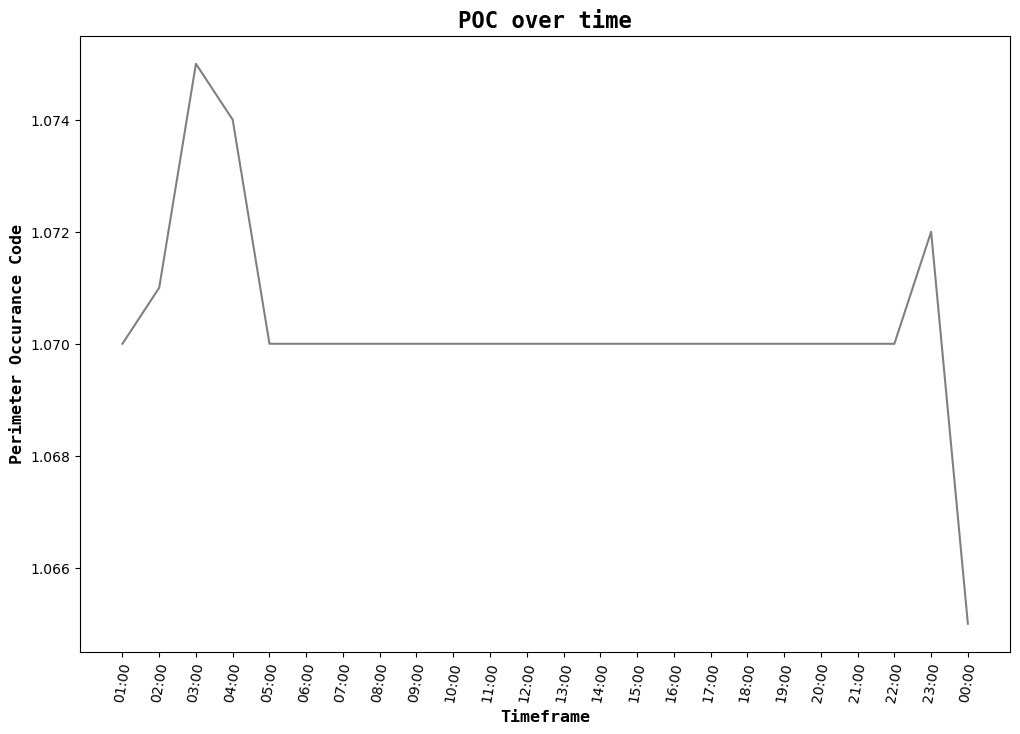

In [40]:
text = "POC over time"
xlabel = "Timeframe"
ylabel = "Perimeter Occurance Code"

plot_lineplots(x=time_list, y=poc_list, labels=[text, xlabel, ylabel], x_rotation=80, color='gray')


• For `poc` graph, it maintains a roughly symmetric shape in nature, except when it climbs at the latter stages of the hours, with the average code rising at a rapid pace at `3:00` and steadily goes downhill at `1.070` which plateaued for most of the time until at `22:00` where it starts to experience a rising trend for an hour but then sharply declines to the minimum value at `00:00`.

### ▼ Pearson Correlation

• One of the imperative steps to data integrity is to locate if there are any `multicolinarities` in the data. `Correlation` helps identify which variables may potentially result in multicolinarity. In this instance, the `Pearson correlation coefficient` is calculated and is displayed as a `heatmap` to correctly establish each numerical variable relationship.

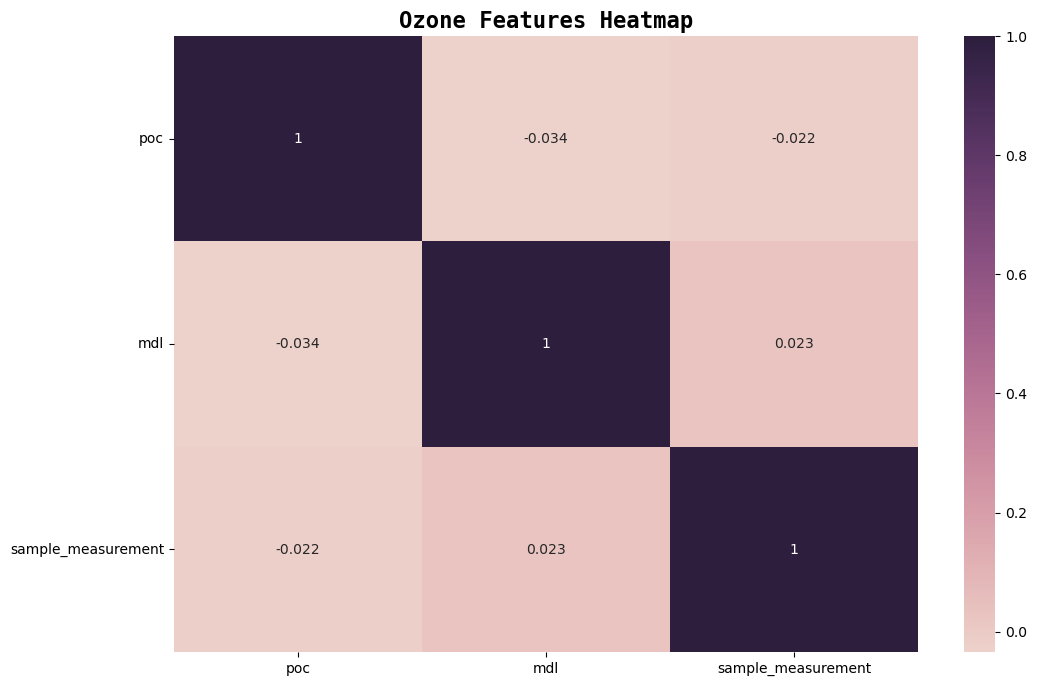

In [6]:
df_heatmap = combined_df[['poc','mdl', 'sample_measurement']]
title = "Ozone Features Heatmap"

plot_corr_heatmap(df_heatmap, title=title)

• From the above matrix, the correlation between `sample_measurement` and `poc` is a `negative correlation` indicating the opposite movement of the two variable with a value of `-0.022`. On the contrary, the `mdl` and `sample_measurement` is `0.023` indicating a `positive correlation`. The correlation for `mdl` between `poc` is `-0.034`, once again, indicating `negative correlation`.

<Figure size 1200x800 with 0 Axes>

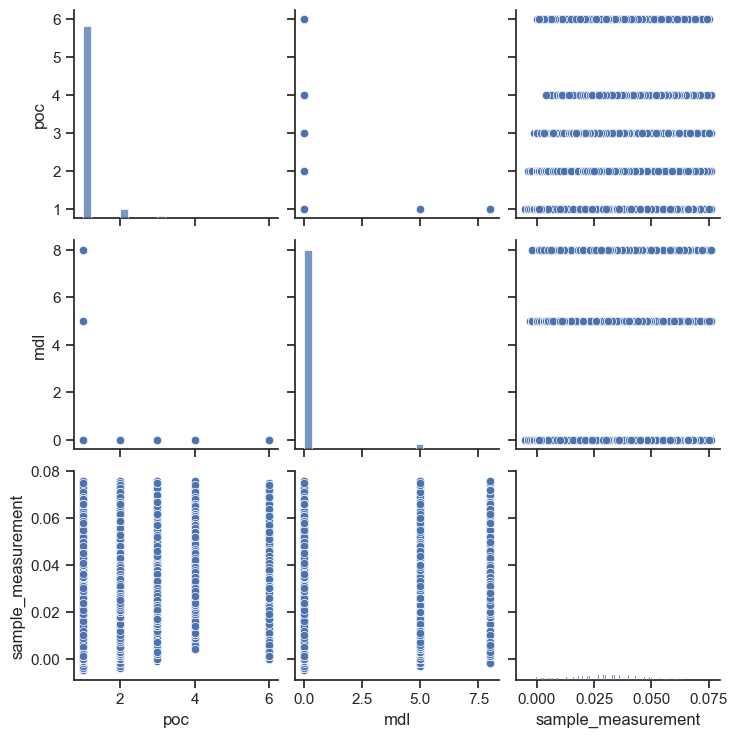

In [91]:
plt.figure(figsize=(12, 8))
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_heatmap)
plt.show()


• The above `Pair plot` based on correlated heatmap is used to describe the best set of features to explain a relationship between the variables.

In [66]:
list(combined_df.columns)

['state_code',
 'county_code',
 'poc',
 'time_local',
 'sample_measurement',
 'units_of_measure',
 'mdl',
 'qualifier',
 'state_name',
 'county_name',
 'date_of_last_change',
 'combined_method']

• Recall earlier the `state_name` being the only column to be kept based on geographical data. Before completing the exploration, it is necessary to commit any changes now. Since the machine learning models are efficient in processing numerical features, instead of taking the `state_name`, the `state_code` will be transformed into integaer and kept in the dataset.

In [77]:
combined_df['state_code'].dtype

dtype('O')

• First, transform the `state_code` from `obj` to `int32`.

In [78]:
combined_df['state_code'] = combined_df['state_code'].astype('int')
combined_df['state_code'].dtype

dtype('int32')

• Then, remove the surplus geographical data.

In [80]:
combined_df.drop(labels=['state_name', 'county_code', 'county_name'], axis=1, inplace=True)
combined_df.columns

Index(['state_code', 'poc', 'time_local', 'sample_measurement',
       'units_of_measure', 'mdl', 'qualifier', 'date_of_last_change',
       'combined_method'],
      dtype='object')

• Finally, remove any other irrelevant values such as `date_of_last_change` as well as `unit_of_measure` as they does not contribute anything to the target variable.

In [87]:
combined_df['date_of_last_change'].nunique()

406

In [88]:
combined_df['units_of_measure'].unique()

array(['Parts per million'], dtype=object)

In [92]:
combined_df.drop(labels=['date_of_last_change', 'units_of_measure'], axis=1, inplace=True)
list(combined_df.columns)

['state_code',
 'poc',
 'time_local',
 'sample_measurement',
 'mdl',
 'qualifier',
 'combined_method']

• Last but not least, save the fully processed dataset as it is ready to be transformed and feed into the Machine Learning Model.

In [93]:
path = "../../dataset/processed/ozone_hourly_2014.parquet"
cu.save_df(combined_df, "parquet", path)

byte_to_mb = 1/(10**6)
processed_size = round(os.path.getsize(path)*byte_to_mb, 2)
print(f"Filtered dataset size: {processed_size} MB.")


Filtered dataset size: 8.55 MB.
